In [1]:
from IPython.display import clear_output
!pip install torchmetrics
clear_output()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [29]:
!pip install --upgrade yfinance
clear_output()

ERROR: Operation cancelled by user


In [3]:
import torch
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from torchmetrics.regression import MeanAbsolutePercentageError

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
data = yf.download("BTC-USD", start = "2020-01-01", end = pd.Timestamp.now().strftime('%Y-%m-%d'))

<ipython-input-4-2138576987>:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("BTC-USD", start = "2020-01-01", end = pd.Timestamp.now().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


In [5]:
data

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
...,...,...,...,...,...
2025-06-09,110294.101562,110561.421875,105400.234375,105793.023438,55903193732
2025-06-10,110257.234375,110380.125000,108367.710938,110295.687500,54700101509


In [18]:
cols = ['Close', 'Open', 'Volume']
data_normalized = StandardScaler().fit_transform(data[cols])

seq_len = 100
X = np.array([data_normalized[i:i+seq_len] for i in range(len(data_normalized)-seq_len)])
y = np.array(data_normalized[seq_len:])

split = int(0.9 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [19]:
import numpy as np

class CustomRNN:
    def __init__(self, input_dim, hidden_dim):
        self.input_weights = np.random.randn(hidden_dim, input_dim) * 0.01
        self.hidden_weights = np.random.randn(hidden_dim, hidden_dim) * 0.01
        self.hidden_bias = np.zeros((hidden_dim, 1))
        self.output_weights = np.random.randn(input_dim, hidden_dim) * 0.01
        self.output_bias = np.zeros((input_dim, 1))

    def forward(self, sequence):
        hidden_states = []
        outputs = []
        current_state = np.zeros((self.hidden_weights.shape[0], 1))

        for input_vec in sequence:
            input_vec = input_vec.reshape(-1, 1)
            current_state = np.tanh(
                self.input_weights @ input_vec +
                self.hidden_weights @ current_state +
                self.hidden_bias
            )
            output = self.output_weights @ current_state + self.output_bias

            hidden_states.append(current_state)
            outputs.append(output)

        return outputs[-1]

    def backward(self, sequence, target, learning_rate=0.001):
        hidden_states = []
        outputs = []
        current_state = np.zeros((self.hidden_weights.shape[0], 1))

        for input_vec in sequence:
            input_vec = input_vec.reshape(-1, 1)
            current_state = np.tanh(
                self.input_weights @ input_vec +
                self.hidden_weights @ current_state +
                self.hidden_bias
            )
            output = self.output_weights @ current_state + self.output_bias

            hidden_states.append(current_state)
            outputs.append(output)

        output_error = (outputs[-1] - target.reshape(-1, 1))
        output_weights_grad = output_error @ hidden_states[-1].T
        output_bias_grad = output_error

        dh = self.output_weights.T @ output_error
        input_weights_grad = np.zeros_like(self.input_weights)
        hidden_weights_grad = np.zeros_like(self.hidden_weights)
        hidden_bias_grad = np.zeros_like(self.hidden_bias)

        for t in reversed(range(len(sequence))):
            x = sequence[t].reshape(-1, 1)
            h_prev = hidden_states[t]
            h_current = hidden_states[t]

            if t > 0:
                h_prev = hidden_states[t-1]

            dtanh = (1 - h_current**2) * dh
            input_weights_grad += dtanh @ x.T
            hidden_weights_grad += dtanh @ h_prev.T
            hidden_bias_grad += dtanh

            dh = self.hidden_weights.T @ dtanh

        self._update_parameters(
            {
                'W_xh': input_weights_grad,
                'W_hh': hidden_weights_grad,
                'b_h': hidden_bias_grad,
                'W_hy': output_weights_grad,
                'b_y': output_bias_grad
            },
            learning_rate,
            clip_value=5.0
        )

    def _update_parameters(self, gradients, lr, clip_value):
        for grad in [gradients['W_xh'], gradients['W_hh'], gradients['W_hy']]:
            np.clip(grad, -clip_value, clip_value, out=grad)

        self.input_weights -= lr * gradients['W_xh']
        self.hidden_weights -= lr * gradients['W_hh']
        self.hidden_bias -= lr * gradients['b_h']
        self.output_weights -= lr * gradients['W_hy']
        self.output_bias -= lr * gradients['b_y']


In [26]:
from tqdm import tqdm

# Параметры модели и обучения
input_size = len(cols)
hidden_size = 64
learning_rate = 0.01
epochs = 20

# Создание экземпляра модели
model = CustomRNN(input_dim=input_size, hidden_dim=hidden_size)

# Функция обучения с callback'ами
def train(model, train_data, params):
    X_train, y_train = train_data
    lr, epochs = params['lr'], params['epochs']
    loss_fn = MeanAbsolutePercentageError()

    loss_history = []

    for epoch in range(epochs):
        epoch_loss = 0.0

        for i in tqdm(range(len(X_train)), desc=f"Epoch {epoch} of train"):
            x = X_train[i]
            y = y_train[i]
            # Прямой проход
            prediction = model.forward(x)

            # Расчет ошибки
            loss = loss_fn(torch.Tensor(prediction), torch.Tensor(y).reshape(-1, 1))
            epoch_loss += loss.item()

            # Обратный проход и обновление весов
            model.backward(x, y, learning_rate=lr)

        avg_loss = epoch_loss / len(X_train)
        loss_history.append(avg_loss)  # Сохраняем потери за эпоху

    return loss_history  # Возвращаем историю потерь

loss_history = train(
    model=model,
    train_data=(X_train, y_train),
    params={'lr': learning_rate, 'epochs': epochs}
)

Epoch 19 of train: 100%|██████████| 1701/1701 [00:12<00:00, 135.29it/s]


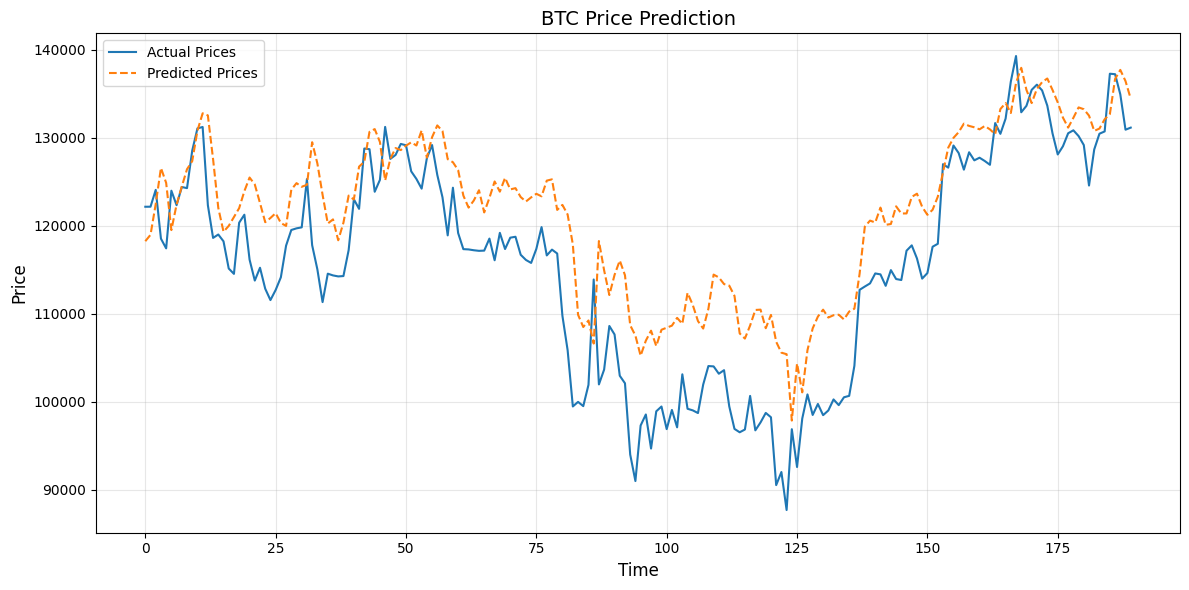

In [28]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import matplotlib.pyplot as plt

scaler = RobustScaler(quantile_range=(25.0, 75.0))
data_normalized = scaler.fit_transform(data[cols])

def make_predictions(model, input_sequences, feature_scaler, feature_count):
    predictions = np.array([model.forward(seq) for seq in input_sequences])
    predictions = predictions.reshape(-1, feature_count)

    return feature_scaler.inverse_transform(predictions)

def generate_forecast(model, last_sequence, feature_scaler, forecast_days=30, feature_count=3):
    forecast_results = np.empty((forecast_days, feature_count))
    current_sequence = last_sequence.copy()

    for i in range(forecast_days):
        next_pred = model.predict(current_sequence)
        forecast_results[i] = next_pred.flatten()
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = next_pred.T

    return feature_scaler.inverse_transform(forecast_results)

test_predictions = make_predictions(
    model=model,
    input_sequences=X_test,
    feature_scaler=scaler,
    feature_count=len(cols)
)

plt.figure(figsize=(12, 6), dpi=100)
actual_prices = scaler.inverse_transform(y_test)[:, 0]
pred_range = range(len(actual_prices))

plt.plot(pred_range, actual_prices, label='Actual Prices', linewidth=1.5)
plt.plot(pred_range, test_predictions[:, 0], '--', label='Predicted Prices', linewidth=1.5)

plt.title('BTC Price Prediction', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Выводы**

Прогноз не всегда совпадал с реальными данными по нескольким причинам:
1. Неустойчивая к выбросам нормализация: StandardScaler был заменен на RobustScaler
2. Малое количество признаков: к Close добавили еще Open и Volumne
3. Архитектура и обучение: был изменен hidden_size и learning rate модели